<a href="https://colab.research.google.com/github/SonAlexLe/Data-Project/blob/master/Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans



In [0]:
df = pd.read_csv(r"/gdrive/My Drive/Colab Notebooks/football_train_x.csv",delimiter = ',')

In [0]:
df.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
0,19,8,2,1,1,18,6,7,2,8,10,5,4
1,24,16,2,0,1,12,8,6,3,12,13,5,1
2,3,12,0,0,0,13,8,4,4,8,8,0,11
3,2,20,0,0,0,7,6,2,2,10,10,2,6
4,24,9,0,1,-1,14,11,6,3,13,16,4,5


In [0]:
a=df.corr()
df.corr()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
HomeTeam,1.000000,-0.046946,0.000821,-0.040918,0.024040,0.060056,0.026261,0.026177,0.010910,0.014629,0.055605,0.038773,0.036823
AwayTeam,-0.046946,1.000000,-0.027036,-0.013577,0.002724,-0.028152,0.030119,-0.023762,0.015520,0.004926,-0.012998,0.022427,0.071642
HTHG,0.000821,-0.027036,1.000000,-0.072001,0.665477,0.155435,-0.048216,0.408615,-0.080869,-0.066694,0.049078,-0.041039,0.017694
HTAG,-0.040918,-0.013577,-0.072001,1.000000,-0.664186,-0.117916,0.188188,-0.123241,0.396402,0.065537,-0.000241,-0.101212,-0.064199
HTR,0.024040,0.002724,0.665477,-0.664186,1.000000,0.168810,-0.157025,0.334990,-0.308912,-0.085993,0.029714,0.039268,0.055323
HS,0.060056,-0.028152,0.155435,-0.117916,0.168810,1.000000,-0.492059,0.708889,-0.317591,-0.121702,0.016326,0.581969,-0.403654
AS,0.026261,0.030119,-0.048216,0.188188,-0.157025,-0.492059,1.000000,-0.343100,0.681688,0.087664,-0.051913,-0.383816,0.549852
HST,0.026177,-0.023762,0.408615,-0.123241,0.334990,0.708889,-0.343100,1.000000,-0.237640,-0.040493,0.004456,0.367217,-0.257454
AST,0.010910,0.015520,-0.080869,0.396402,-0.308912,-0.317591,0.681688,-0.237640,1.000000,0.099235,-0.058729,-0.236496,0.288963
HF,0.014629,0.004926,-0.066694,0.065537,-0.085993,-0.121702,0.087664,-0.040493,0.099235,1.000000,0.112903,-0.073759,0.001881


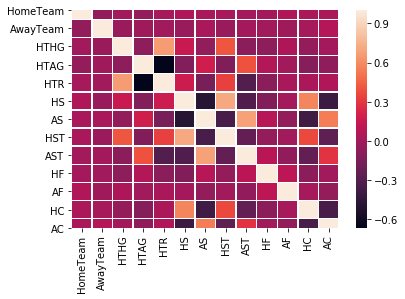

In [0]:
ax = sns.heatmap(a,linewidth=0.5)
plt.show()

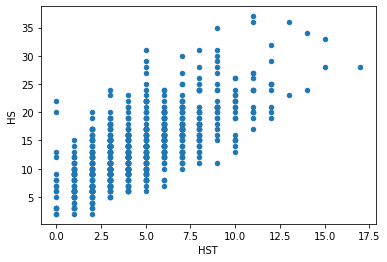

In [0]:
df.plot(x='HST',y='HS',kind = 'scatter')

In [0]:
scaled_df = preprocessing.scale(df)

In [0]:
pca = PCA()
pca.fit(scaled_df)
pca_data=pca.transform(scaled_df)


In [0]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

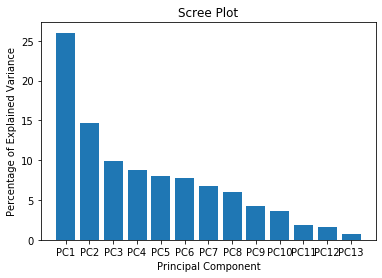

In [0]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 

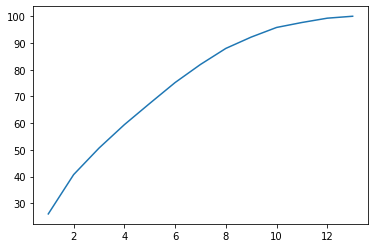

In [0]:
haha = pca.explained_variance_ratio_.cumsum()*100
plt.plot(range(1,len(haha)+1),haha)

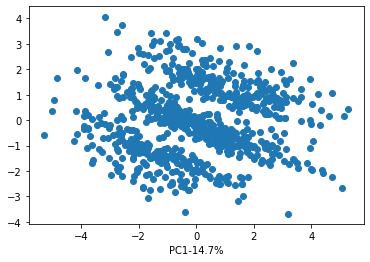

In [0]:
pca_df=pd.DataFrame(pca_data,columns=labels)

plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.xlabel('PC1-{0}%'.format(per_var[1]))



    
plt.show()
    

In [0]:
kmeans = KMeans(3)
concac = kmeans.fit_predict(pca_df[['PC1','PC2']])
concac1 = pd.DataFrame(concac)
concac1

,0
0,2
1,2
2,0
3,0
4,1
...,...
793,0
794,0
795,1
796,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 1440x7200 with 0 Axes>

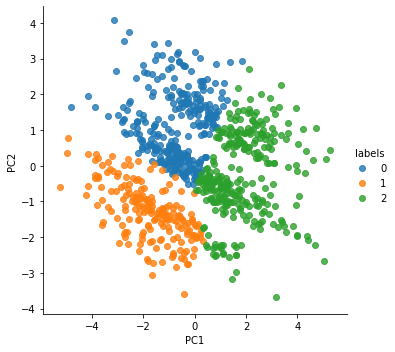

In [0]:
df5= pca_df[['PC1','PC2']]
df5['labels']=concac1
plt.figure(figsize = (20,100))
sns.lmplot(x='PC1',y='PC2',data=df5,fit_reg=False,hue='labels')

In [0]:
loading_scores = pd.Series(pca.components_[0], index=df.columns)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

HS      0.426053
AS     -0.411104
HST     0.389691
AST    -0.365324
HC      0.321803
AC     -0.286818
HTR     0.279912
HTAG   -0.226984
HTHG    0.196173
HF     -0.089044
dtype: float64


In [0]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797
HomeTeam,19,24,3,2,24,19,22,20,10,15,9,2,16,14,15,22,5,14,0,3,24,25,16,17,20,11,16,16,0,13,14,25,12,20,2,2,3,12,19,21,...,12,20,15,13,9,22,23,6,2,22,2,21,11,24,1,20,5,17,24,6,0,19,18,2,7,19,2,12,23,15,19,4,9,1,17,25,6,9,0,12
AwayTeam,8,16,12,20,9,12,6,24,3,14,4,18,24,4,19,14,15,22,11,5,19,22,18,3,18,21,18,6,9,15,20,18,6,0,20,15,22,24,22,19,...,5,9,12,7,24,14,10,19,4,9,6,19,4,2,15,3,23,16,6,3,3,15,22,17,21,3,23,1,15,22,21,10,5,19,12,20,16,2,7,18
HTHG,2,2,0,0,0,1,0,1,2,0,0,1,1,1,1,3,1,0,3,1,2,1,0,0,0,0,0,1,1,0,0,0,0,2,1,2,0,0,2,0,...,1,0,1,1,0,0,1,0,3,0,1,0,0,0,0,2,0,0,2,0,0,1,1,2,1,0,0,0,0,0,3,1,0,0,1,0,1,0,1,1
HTAG,1,0,0,0,1,1,1,0,0,0,0,1,1,1,1,2,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,2,0,1,0,0,1,0,0,...,1,1,0,1,2,1,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1
HTR,1,1,0,0,-1,0,-1,1,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,-1,0,0,0,0,-1,1,0,1,0,-1,1,0,...,0,-1,1,0,-1,-1,-1,0,1,-1,1,0,0,-1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,-1,1,0,1,-1,1,0
HS,18,12,13,7,14,16,24,15,9,8,19,35,10,13,10,15,11,10,20,12,18,15,34,5,14,12,13,22,17,10,6,15,14,20,16,13,20,8,27,15,...,12,24,15,12,10,15,14,7,21,25,20,12,14,11,10,21,36,11,24,17,18,14,4,17,11,12,27,15,12,13,21,18,6,12,13,10,16,6,15,23
AS,6,8,8,6,11,3,10,10,17,16,10,5,17,14,10,12,11,10,10,11,13,14,6,11,11,8,5,9,6,16,14,10,11,5,11,4,10,12,9,16,...,9,7,13,13,15,4,14,18,5,6,6,11,9,13,4,5,6,6,5,11,3,16,23,12,6,6,6,8,9,9,1,15,22,13,3,16,15,15,11,6
HST,7,6,4,2,6,5,5,4,5,0,3,9,4,4,2,8,7,4,11,8,9,6,14,2,3,5,3,7,8,2,2,1,5,6,7,10,6,1,11,8,...,4,8,7,4,4,3,3,1,7,5,7,4,5,4,3,10,13,3,14,5,3,8,2,11,4,2,7,3,4,5,9,8,0,1,5,3,5,1,6,10
AST,2,3,4,2,3,2,3,4,7,2,2,4,2,5,4,3,4,4,4,2,2,6,1,5,3,1,1,5,2,1,4,3,6,4,4,1,2,5,2,5,...,4,4,4,6,5,3,6,5,1,4,1,5,5,3,2,2,2,2,1,6,1,5,5,3,5,1,1,1,4,3,0,7,3,3,1,6,4,7,8,4
HF,8,12,8,10,13,11,15,11,9,7,11,7,8,13,15,12,12,13,11,5,19,16,11,8,11,8,4,8,16,12,6,8,14,17,10,5,11,12,8,17,...,4,5,8,10,10,8,16,5,5,12,9,13,12,11,15,8,15,10,8,6,15,13,7,4,8,6,5,9,10,14,5,9,9,13,9,11,6,9,5,7


In [0]:
df.T.index

Index(['HomeTeam', 'AwayTeam', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST',
       'HF', 'AF', 'HC', 'AC'],
      dtype='object')